In [1]:
%pip install transformers[torch]
%pip install 'accelerate>=0.26.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 745.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 609.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 7.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.8/447.8 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 21.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: y

In [7]:
%pip install datasets
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 23.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 25.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
print(torch.__version__)


2.3.1


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print device name 
print(torch.cuda.get_device_name(0))

2024-12-09 20:17:52.065941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 20:17:52.711753: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 20:17:52.711950: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 20:17:52.714604: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-09 20:17:53.154626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

NVIDIA GeForce GTX 1050


In [2]:
df = pd.read_csv('data_preprocessed_1.csv')

df = df.rename(columns={"category": "labels"})

# medi_df = df[df['labels'] == 'MEDI'].sample(frac=0.33, random_state=42)
# other_df = df[df['labels'] != 'MEDI']
# df = pd.concat([medi_df, other_df])
# df = df.sample(frac=1, random_state=42)
# df.reset_index(drop=True, inplace=True)


# df = df.sample(frac=0.25, random_state=42)  # Keep 25% (1/4th) of the data
# df = df.reset_index(drop=True)

class_names = df['labels'].unique()
label_mapping = {label: idx for idx, label in enumerate(class_names)}
df['label_ids'] = df['labels'].map(label_mapping)

In [4]:
# Data Preparation
# data = {
#     'texts': [
#         "flexible printed active antenna digital television",
#         "parametric study hydrogen production sorption",
#         "superhydrophobic coating fluoroalkylsilane modification",
#         "electrochemical impedance base dna sensor pyrr...",
#         "evaluation outsource transportation contract s...",
#         "financial performance analysis automotive indust...",
#         "impact social media customer relationship manag...",
#         "design optimization hybrid renewable energy sys...",
#         "synthesis characterization nanomaterials drug d...",
#         "analysis consumer behavior online shopping plat..."
#     ],
#     'labels': ['ENGI', 'CHEM', 'CHEM', 'CHEM', 'BUSI',"BUSI","BUSI","ENGI","CHEM","BUSI"]
# }
# df = pd.DataFrame(data)


df = df.rename(columns={"category": "labels"})

# Splitting the data into training and testing sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df['texts'], df['labels'], test_size=0.2, random_state=42, stratify=df['labels'])

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels)

In [5]:
# Load pre-trained BERT tokenizer
model_name = 'distilbert-base-uncased'
# model_name = 'prajjwal1/bert-small'
# model_name = './checkpoint-8500'


tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# max_length = 512
# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples['texts'], padding='max_length', truncation=True)
# def tokenize_function(examples):
#     return tokenizer(examples['texts'], padding='max_length', truncation=True, max_length=max_length)
# Create dataset objects
train_dataset = Dataset.from_dict({'texts': train_texts.tolist(), 'labels': train_labels.tolist()})
val_dataset = Dataset.from_dict({'texts': val_texts.tolist(), 'labels': val_labels.tolist()})
test_dataset = Dataset.from_dict({'texts': test_texts.tolist(), 'labels': test_labels.tolist()})

# Apply tokenization to the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Convert labels to numerical format
label_map = {label: idx for idx, label in enumerate(df['labels'].unique())}
train_dataset = train_dataset.map(lambda examples: {'labels': [label_map[label] for label in examples['labels']]}, batched=True)
val_dataset = val_dataset.map(lambda examples: {'labels': [label_map[label] for label in examples['labels']]}, batched=True)
test_dataset = test_dataset.map(lambda examples: {'labels': [label_map[label] for label in examples['labels']]}, batched=True)

Map:   0%|          | 0/31352 [00:00<?, ? examples/s]

Map:   0%|          | 0/3919 [00:00<?, ? examples/s]

Map:   0%|          | 0/3919 [00:00<?, ? examples/s]

Map:   0%|          | 0/31352 [00:00<?, ? examples/s]

Map:   0%|          | 0/3919 [00:00<?, ? examples/s]

Map:   0%|          | 0/3919 [00:00<?, ? examples/s]

In [12]:
# print(len(train_dataset[0]['input_ids']))
# print(len(train_dataset[0]['attention_mask']))
# import os
# os.environ['WANDB_DISABLED'] = 'true'

# Load pre-trained BERT model for sequence classification
model_name = '/mnt/c/Users/ASUS/Documents/Projects/data-sci/checkpoint-11500'

model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=len(df['labels'].unique()))
# model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(df['labels'].unique()))

model.to(device)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    evaluation_strategy="epoch",     # evaluate each `logging_steps`
    learning_rate=2e-5,              # learning rate
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    num_train_epochs=5,             # number of training epochs
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    report_to=None
)

# Define the Trainer
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

# Train the model
# trainer.train()

# Evaluate the model
# eval_results = trainer.evaluate(eval_dataset=test_dataset)

# print("Evaluation Results:", eval_results)


/home/kanakorn/venv/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [13]:
inverse_label_map = {v: k for k, v in label_map.items()}
display_labels = [inverse_label_map[i] for i in range(len(label_map))]

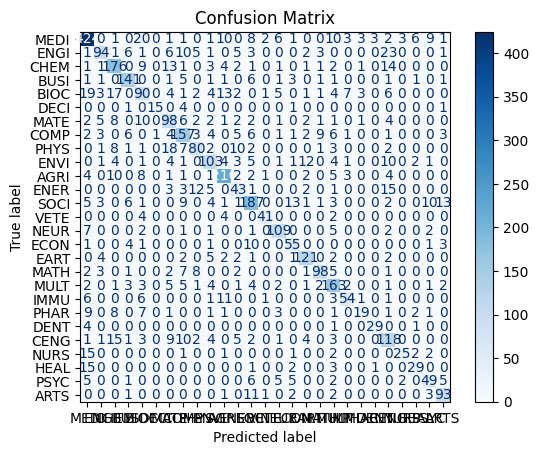

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test set
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = [label_map[label] for label in test_labels]

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Convert numeric labels back to original labels for display purposes
inverse_label_map = {v: k for k, v in label_map.items()}
display_labels = [inverse_label_map[i] for i in range(len(label_map))]

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

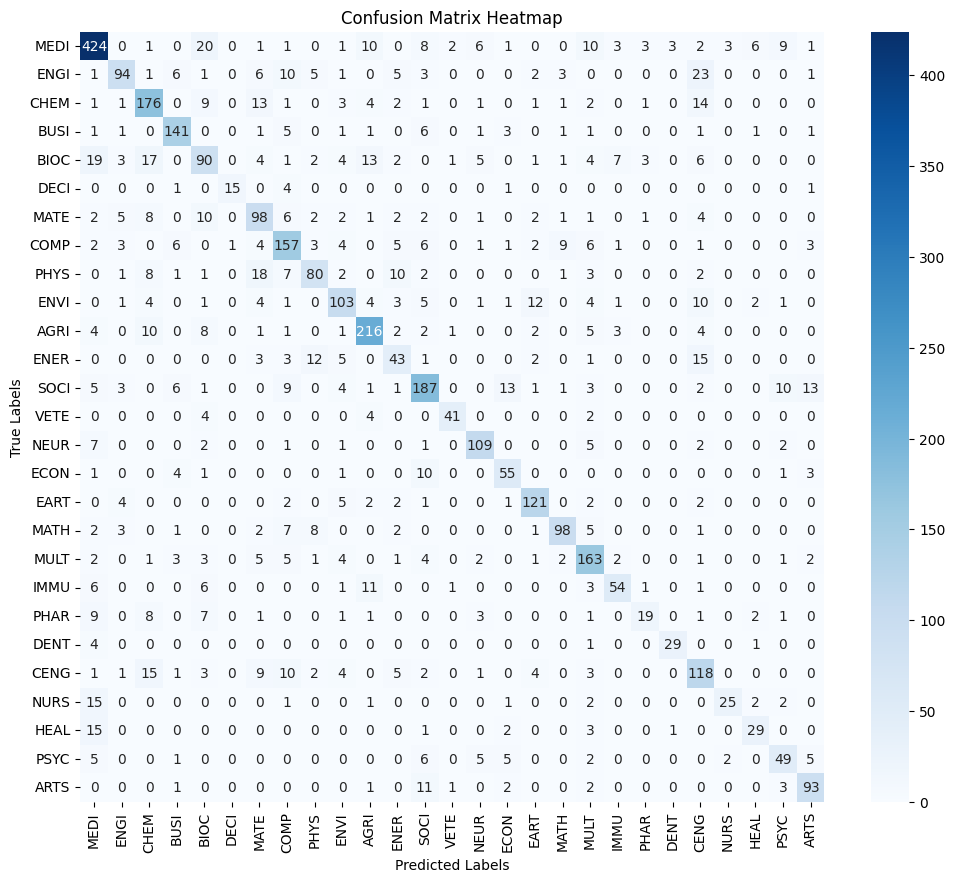

In [15]:
import seaborn as sns

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [16]:
# Calculate the number of correct predictions
correct_predictions = (pred_labels == true_labels).sum()

print(f"Number of correct predictions: {correct_predictions}")
print(f"Total number of predictions: {len(true_labels)}")
print(f"Accuracy: {correct_predictions / len(true_labels) * 100:.2f}%")

Number of correct predictions: 2827
Total number of predictions: 3919
Accuracy: 72.14%


In [14]:
# Define a threshold for the difference between the highest and second highest prediction scores
threshold = 0.1

# Get the prediction scores
prediction_scores = predictions.predictions

# Find the indices where the difference between the highest and second highest scores is below the threshold
close_predictions_indices = []
for i, scores in enumerate(prediction_scores):
    sorted_scores = np.sort(scores)
    if sorted_scores[-1] - sorted_scores[-2] < threshold:
        close_predictions_indices.append(i)

# Print out the predictions where the output of different classes are close together
for idx in close_predictions_indices:
    print(f"Text: {test_texts.iloc[idx]}")
    print(f"True Label: {inverse_label_map[true_labels[idx]]}")
    print(f"Predicted Label: {inverse_label_map[pred_labels[idx]]}")
    print(f"Prediction Scores: {prediction_scores[idx]}")
    print("\n")

Text: narrative review literature reproductive health female sex worker have age year © 2019 ibn sina trust right reserve objective female sex worker fsws 20 year age range 1,000 575,000 different city country globe handful information reproductive health rh issue young fsw perspective service utilization healthcare system review exist literature view describe reproductive health problem service utilization service availability information source fsws age < 20 year material method web base search google google scholar medline/ pubmed/ pubmed central hinari jstor perform english language prevalence health issue percentage service utilization show range minimum maximum value calculate different study result finding identify follow rh problem unintended pregnancy 52%-95 induce abortion 51%-53 repeat multiple abortion 13%-43 childbirth experience sexually transmit infection 74%-84 hiv 1%-60.6 violence beat rob pay forced coerced sex rape mental disorder depression suicidal thought consiste

Text: pigeon hole principle, Predicted Label: MATH
Text: chemical reaction, Predicted Label: CHEM
Text: financial analysis, Predicted Label: ECON
Text: solar energy, Predicted Label: ENER
Text: customer relationship management, Predicted Label: BUSI


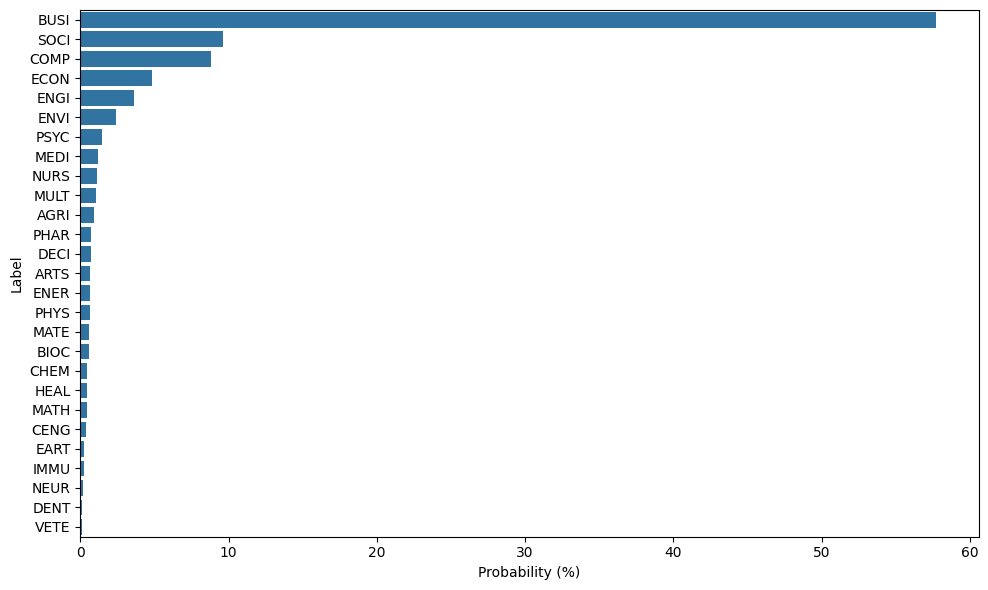


Predictions for new texts: ['MATH', 'CHEM', 'ECON', 'ENER', 'BUSI']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# If you want to classify new text data
new_texts = [""]
new_encodings = tokenizer(new_texts, padding=True, truncation=True, return_tensors='pt').to(device)

inverse_label_map = {v: k for k, v in label_map.items()}
display_labels = [inverse_label_map[i] for i in range(len(label_map))]
with torch.no_grad():
    outputs = model(**new_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)
    pred_probs = torch.softmax(outputs.logits, dim=-1)
    for i, prediction in enumerate(predictions):
        print(f"Text: {new_texts[i]}, Predicted Label: {inverse_label_map[prediction.item()]}")
    # for label, prob in zip(display_labels, pred_probs[i]):
    #     print(f"Label: {label}, {prob*100:.2f}%")
    probs_df = pd.DataFrame({
        'Label': display_labels,
        'Probability': pred_probs[i].cpu().numpy() * 100  # Convert to NumPy array and scale to percentage
    })
    
    # create vizualization of the probabilities as seaborn figure
    
    # Create a bar plot using Seaborn
    probs_df = probs_df.sort_values('Probability', ascending=False)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.barplot(x='Probability', y='Label', data=probs_df, orient='h')
    plt.xlabel('Probability (%)')
    plt.ylabel('Label')
    # plt.xticks(rot ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()


predicted_labels = [inverse_label_map[prediction.item()] for prediction in predictions]

print("\nPredictions for new texts:", predicted_labels)